# 1. Importar librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

from importlib import reload
import utils  # Importa el módulo
reload(utils)  # Recarga el módulo

<module 'utils' from 'c:\\Users\\USUARIO\\OneDrive - Universidad de Antioquia\\Aprendizaje\\Universidad\\2023-2\\Analítica II\\Caso Estudio Supervisado\\pediccion_abandono_empleo\\utils.py'>

# 2. Obtener datos

#### Importar datos

In [5]:
df_total = pd.read_csv('Datasets/datos_preparados.csv')
df_anova = pd.read_csv('Datasets/seleccion_anova.csv')

#### Separar variable objetivo y hacer el split

In [10]:
X = df_anova
y = df_total.target

X_train, X_test, y_train, y_test = utils.split(X, y, test_size = 0.2)

X train shape:  (3520, 30)
y train shape:  (881, 30)
X test shape:  (3520,)
y test shape:  (881,)


## 3. Random Forest Classifier

#### Definir grilla

In [11]:
parameters = {'max_depth': [40,50,60,70],
              'max_features': [0.9,1],
              'max_leaf_nodes': [110,120,130],
              'min_samples_leaf': [3,5,7,9],
              'n_estimators': [800]}

#### Realizar la búsqueda

In [ ]:
ranfor = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

rand_s = RandomizedSearchCV(estimator=ranfor,
                            param_distributions=parameters,
                            n_iter=10,
                            scoring='f1',
                            cv=5,
                            verbose=False)
rand_s.fit(X_train, y_train)

#### Instanciar y ajustar modelo con los mejores hiperparámetros encontrados

In [12]:
ranfor_opt = RandomForestClassifier(
    class_weight = 'balanced',
    max_depth = 30,
    max_features = 1,
    max_leaf_nodes = 190,
    min_samples_leaf = 3,
    n_estimators = 1000,
    n_jobs = -1,
    random_state = 42
)
ranfor_opt.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=1,
                       max_leaf_nodes=190, min_samples_leaf=3,
                       n_estimators=1000, n_jobs=-1, random_state=42)

#### Desempeño en train

------------------------------ TRAIN ------------------------------


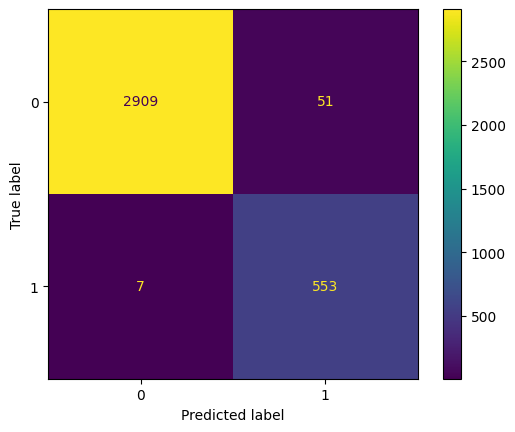

Precision: 0.9155629139072847
Recall: 0.9875
Especificidad: 0.9827702702702703
F1 score: 0.9501718213058419
Train score:  0.9835227272727273


In [13]:
precision_rf_train, recall_rf_train, especificidad_rf_train, f1_score_rf_train = utils.metricas(ranfor_opt, X_train, y_train, 'TRAIN')

#### Desempeño en test

------------------------------ TEST ------------------------------


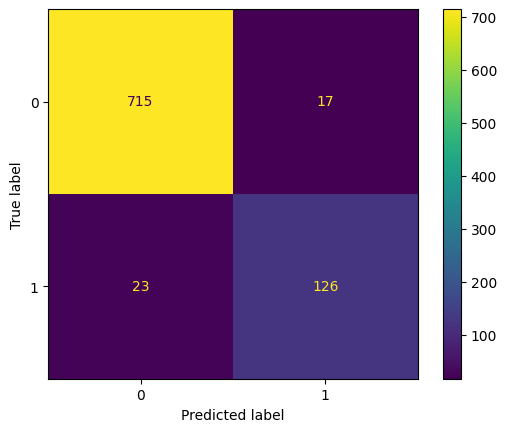

Precision: 0.8811188811188811
Recall: 0.8456375838926175
Especificidad: 0.976775956284153
F1 score: 0.863013698630137
Train score:  0.9545970488081725


In [14]:
precision_rf_test, recall_rf_test, especificidad_rf_test, f1_score_rf_test = utils.metricas(ranfor_opt, X_test, y_test, 'TEST')

# 4. Xtreme Gradiant Boosting

#### Definir grilla

In [16]:
parameters_gb =  {'eta': [0.3,0.4,0.5,0.6],
              'colsample_bytree': [0.8,0.9,1],
              'max_depth': [4,6,8,10,12],
              'n_estimators': [800,1000,1200],
              'learning_rate':[0.1,0.2,0.3]
              }

#### Realizar búsqueda

In [ ]:
XGBmodel = XGBClassifier(random_state = 42, classmethod='')

rand_s_xgb = RandomizedSearchCV(estimator = XGBmodel,
                                param_distributions = parameters,
                                n_iter = 15,
                                scoring = 'recall',
                                cv=10,
                                n_jobs = -1,
                                verbose = False)
rand_s_xgb.fit(X_train, y_train)

#### Instanciar y ajustar modelo con mejores hiperparámetros

In [17]:
xgb_opt = XGBClassifier(
    random_state = 42,
    n_jobs = -1,
    learning_rate = 0.05,
    max_depth = 20,
    n_estimators = 1400,
    colsample_bytree = 0.9
)
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1400, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

#### Desempeño en train

------------------------------ TRAIN ------------------------------


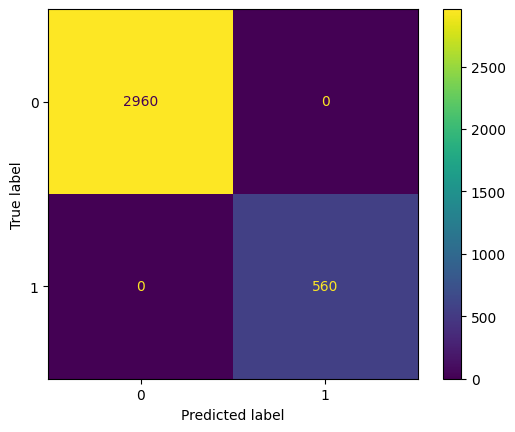

Precision: 1.0
Recall: 1.0
Especificidad: 1.0
F1 score: 1.0
Train score:  1.0


In [18]:
precision_xgb_train, recall_xgb_train, especificidad_xgb_train, f1_score_xgb_train = utils.metricas(xgb_opt , X_train, y_train, 'TRAIN')

#### Desempeño en test

------------------------------ TEST ------------------------------


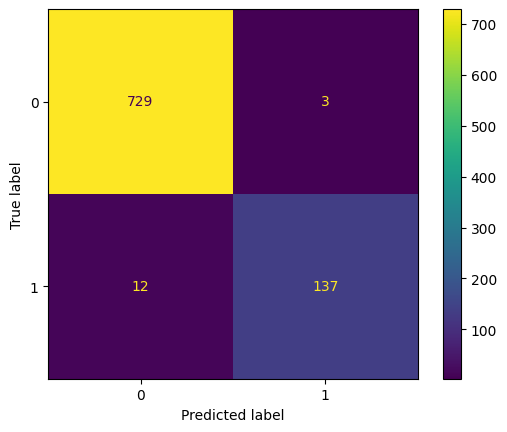

Precision: 0.9785714285714285
Recall: 0.9194630872483222
Especificidad: 0.9959016393442623
F1 score: 0.9480968858131488
Train score:  0.9829738933030647


In [19]:
precision_xgb_test, recall_xgb_test, especificidad_xgb_test, f1_score_xgb_test = utils.metricas(xgb_opt , X_test, y_test, 'TEST')

# 5. Suport Vector Machine 

#### Definir grilla

In [45]:
param_svm = {
    'C': [1, 2, 3, 4],
    'gamma': [0.02,0.01,0.03,0.04]
    }

#### Hacer la búsqueda

In [46]:
svm = SVC(random_state = 42, class_weight = 'balanced')

rand_s_svm = RandomizedSearchCV(estimator = svm,
                            param_distributions = param_svm,
                            n_iter = 2,
                            scoring = 'f1',
                            cv = 5,
                            verbose = False,
                            n_jobs = -1)
rand_s_svm.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=SVC(class_weight='balanced', random_state=42),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4],
                                        'gamma': [0.02, 0.01, 0.03, 0.04]},
                   scoring='f1', verbose=False)

In [47]:
rand_s_svm.best_estimator_

SVC(C=2, class_weight='balanced', gamma=0.01, random_state=42)

#### Instanciar y ajustar modelo con mejores hiperparámetros

In [48]:
svm_opt = SVC(class_weight='balanced',
          gamma = 0.01,
          kernel='rbf',
          C=2,
          random_state=42,
          max_iter=-1
        )
svm_opt.fit(X_train, y_train)

SVC(C=2, class_weight='balanced', gamma=0.01, random_state=42)

#### Desempeño en train

------------------------------ TRAIN ------------------------------


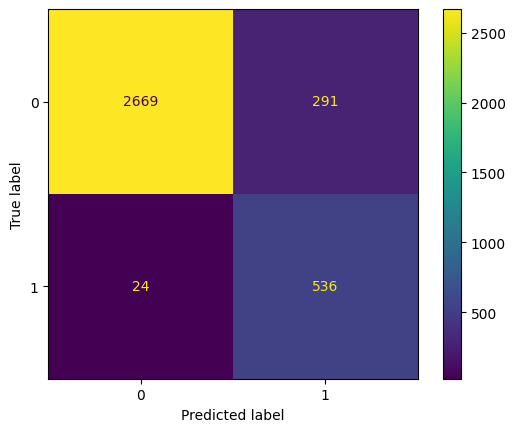

Precision: 0.6481257557436517
Recall: 0.9571428571428572
Especificidad: 0.9016891891891892
F1 score: 0.7728911319394377
Train score:  0.9105113636363636


In [49]:
precision_svm_train, recall_svm_train, especificidad_svm_train, f1_score_svm_train = utils.metricas(svm_opt, X_train, y_train, 'TRAIN')

#### Desempeño en test

------------------------------ TEST ------------------------------


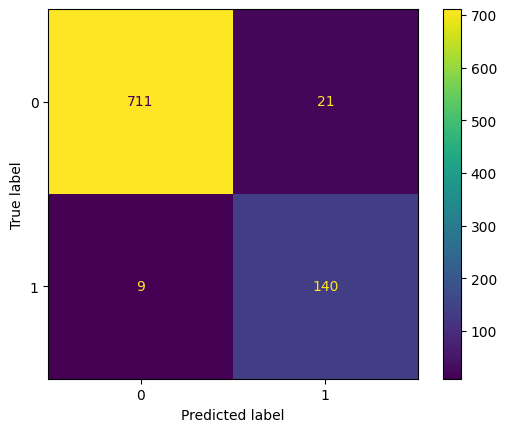

Precision: 0.8695652173913043
Recall: 0.9395973154362416
Especificidad: 0.9713114754098361
F1 score: 0.903225806451613
Train score:  0.9659477866061293


In [44]:
precision_svm_test, recall_svm_test, especificidad_svm_test, f1_score_svm_test = utils.metricas(svm_opt, X_test, y_test, 'TEST')